[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/kadenze-deeplearning-creative-applications/blob/master/Kadenze_Session_4.ipynb)

In [2]:
#!rm -rf ./*
!git clone https://github.com/JacksonIsaac/CADL.git
!mv CADL/session-4/* .

!pip uninstall -y matplotlib && pip install matplotlib==2.0.2

fatal: destination path 'CADL' already exists and is not an empty directory.
mv: cannot stat 'CADL/session-4/*': No such file or directory
Uninstalling matplotlib-2.0.2:
  Successfully uninstalled matplotlib-2.0.2
  Using cached https://files.pythonhosted.org/packages/60/d4/6b6d8a7a6bc69a1602ab372f6fc6e88ef88a8a96398a1a25edbac636295b/matplotlib-2.0.2-cp36-cp36m-manylinux1_x86_64.whl


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import IPython.display as ipyd
from libs import gif, nb_utils

In [0]:
sess = tf.InteractiveSession()

In [0]:
from libs import inception

In [6]:
net = inception.get_inception_model()

In [7]:
!unzip inception5h.zip

Archive:  inception5h.zip
  inflating: imagenet_comp_graph_label_strings.txt  
  inflating: tensorflow_inception_graph.pb  
  inflating: LICENSE                 


In [0]:
tf.import_graph_def(net['graph_def'], name='inception')
g = tf.get_default_graph()

names = [op.name for op in g.get_operations()]

In [9]:
names

['inception/input',
 'inception/conv2d0_w',
 'inception/conv2d0_b',
 'inception/conv2d1_w',
 'inception/conv2d1_b',
 'inception/conv2d2_w',
 'inception/conv2d2_b',
 'inception/mixed3a_1x1_w',
 'inception/mixed3a_1x1_b',
 'inception/mixed3a_3x3_bottleneck_w',
 'inception/mixed3a_3x3_bottleneck_b',
 'inception/mixed3a_3x3_w',
 'inception/mixed3a_3x3_b',
 'inception/mixed3a_5x5_bottleneck_w',
 'inception/mixed3a_5x5_bottleneck_b',
 'inception/mixed3a_5x5_w',
 'inception/mixed3a_5x5_b',
 'inception/mixed3a_pool_reduce_w',
 'inception/mixed3a_pool_reduce_b',
 'inception/mixed3b_1x1_w',
 'inception/mixed3b_1x1_b',
 'inception/mixed3b_3x3_bottleneck_w',
 'inception/mixed3b_3x3_bottleneck_b',
 'inception/mixed3b_3x3_w',
 'inception/mixed3b_3x3_b',
 'inception/mixed3b_5x5_bottleneck_w',
 'inception/mixed3b_5x5_bottleneck_b',
 'inception/mixed3b_5x5_w',
 'inception/mixed3b_5x5_b',
 'inception/mixed3b_pool_reduce_w',
 'inception/mixed3b_pool_reduce_b',
 'inception/mixed4a_1x1_w',
 'inception/mixe

In [0]:
input_name = names[0] + ':0'

x = g.get_tensor_by_name(input_name)
softmax = g.get_tensor_by_name(names[-1] + ':0')

In [11]:
print(x)
print(softmax)

Tensor("inception/input:0", dtype=float32, device=/device:CPU:0)
Tensor("inception/output2:0", shape=(?, 1008), dtype=float32, device=/device:CPU:0)


In [0]:
#tf.test.gpu_device_name()

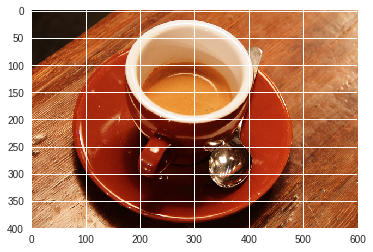

In [13]:
from skimage.data import coffee

og = coffee()
plt.imshow(og)

In [14]:
print(og.shape)
img = inception.preprocess(og)
print(img.shape)

img_4d = img[np.newaxis]
print(img_4d.shape)

(400, 600, 3)
(299, 299, 3)
(1, 299, 299, 3)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


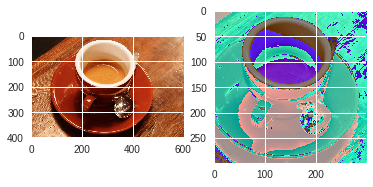

In [15]:
img = img.astype(np.uint8)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(og)
axs[1].imshow(img)

In [16]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))
print(res.shape)

(16, 1008)


In [0]:
res = np.mean(res, 0)
res = res / np.sum(res)

In [18]:
print([(res[idx], net['labels'][idx]) for idx in res.argsort()[-5:][::-1]])

[(0.998492, (947, 'espresso')), (0.00063125236, (859, 'cup')), (0.0005024138, (953, 'chocolate sauce')), (0.00019483188, (844, 'consomme')), (0.00013370324, (822, 'soup bowl'))]


In [19]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


In [0]:
from libs import utils

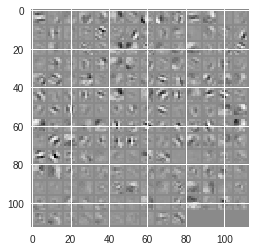

In [21]:
W_montage = utils.montage_filters(W_eval)
plt.figure()
plt.imshow(W_montage, interpolation='nearest')

In [0]:
Ws = [utils.montage_filters(W_eval[:, :, [i], :]) for i in range(3)]
Ws = np.rollaxis(np.array(Ws), 0, 3)

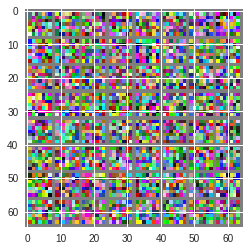

In [23]:
plt.figure()
plt.imshow(Ws, interpolation='nearest')

In [24]:
np.min(Ws), np.max(Ws)

(-6.409200668334961, 6.334986209869385)

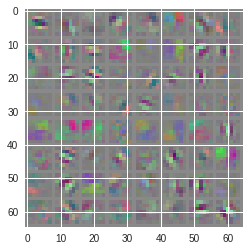

In [25]:
Ws = (Ws / np.max(np.abs(Ws)) * 128 + 128).astype(np.uint8)

plt.figure()
plt.imshow(Ws, interpolation='nearest')

In [0]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
layer_shape = tf.shape(feature).eval(feed_dict={x:img_4d})

In [27]:
print(layer_shape)

[  1 150 150  64]


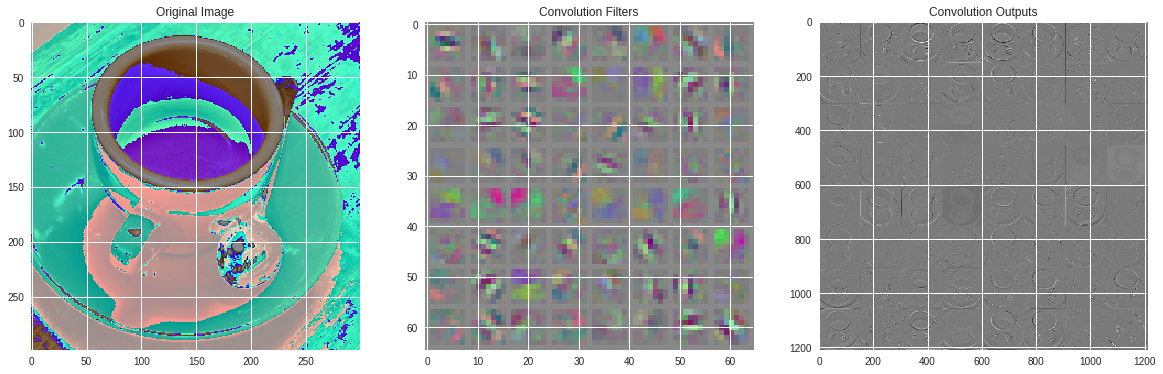

In [28]:
f = feature.eval(feed_dict={x:img_4d})
montage = utils.montage_filters(np.rollaxis(np.expand_dims(f[0], 3), 3, 2))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(img.astype(np.uint8))
axs[0].set_title('Original Image')
axs[1].imshow(Ws, interpolation='nearest')
axs[1].set_title('Convolution Filters')
axs[2].imshow(montage, cmap='gray')
axs[2].set_title('Convolution Outputs')

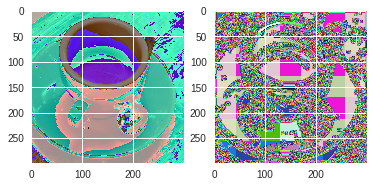

In [29]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient = tf.gradients(tf.reduce_max(feature, 3), x)

res = sess.run(gradient, feed_dict={x: img_4d})[0]

fig, axs = plt.subplots(1, 2)

axs[0].imshow(img.astype(np.uint8))
axs[1].imshow(res[0])

In [0]:
def normalize(img, s=0.1):
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

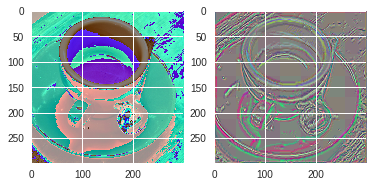

In [32]:
r = normalize(res)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(img.astype(np.uint8))
axs[1].imshow(r[0])

In [0]:
def compute_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:, :, :, neuron_i]), x)
    res = sess.run(gradient, feed_dict={input_placeholder: img})[0]
    return res

def compute_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder: img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

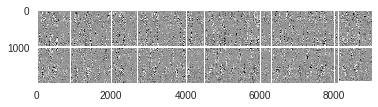

In [34]:
gradients = compute_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')
gradients_norm = [normalize(gradient_i[0]) for gradient_i in gradients]

montage = utils.montage_filters(np.array(gradients_norm))

plt.figure()
plt.imshow(montage)

In [35]:
features = [name for name in names if 'maxpool' in name.split('/')[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


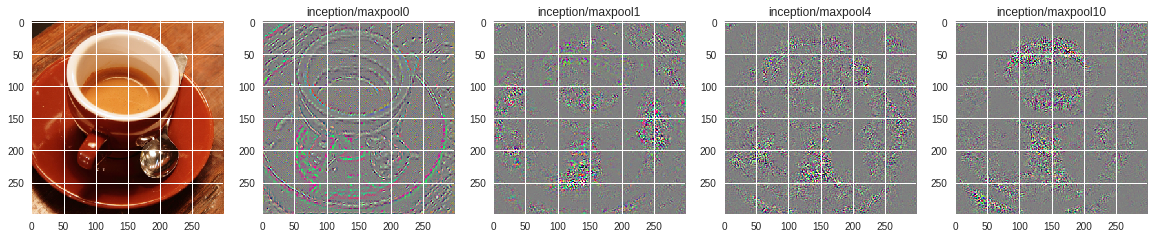

In [36]:
n_plots = len(features) + 1
fig, axs = plt.subplots(1, n_plots, figsize=(20, 5))
base = img_4d
axs[0].imshow(inception.deprocess(img))

for feature_i, featurename in enumerate(features):
    feature = g.get_tensor_by_name(featurename + ':0')
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1)
    gradient = tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x: base})[0]
    axs[feature_i+1].imshow(normalize(this_res))
    axs[feature_i+1].set_title(featurename)